# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import matplotlib.pyplot as plt
import requests
import pandas as pd
#from config import api_key

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

# set up lists to hold reponse info
lat = []
lng = []
temp_max = []
humidity = []
cloudness = [] 
wind_speed = []
country = []
date = []
temp = []
cities_found = []

for city in cities:
    
    
    response = requests.get(query_url + city).json()
#     print(response)
    try:
        
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_found.append(city)
        print(" Found City : " + city)
        
    except:
        
        print("Couldn't find : " + city)

 Found City : rikitea
 Found City : broken hill
 Found City : cape town
 Found City : chuy
 Found City : mataura
 Found City : atuona
 Found City : saint-philippe
 Found City : mardin
 Found City : ostrovnoy
 Found City : qaanaaq
 Found City : naryan-mar
 Found City : sakakah
Couldn't find : yunjinghong
Couldn't find : bur gabo
 Found City : saldanha
 Found City : verkhnyaya inta
 Found City : punta arenas
 Found City : vestmannaeyjar
 Found City : beringovskiy
Couldn't find : mutsamudu
 Found City : vaini
 Found City : severnyy
 Found City : manta
 Found City : isangel
 Found City : lorengau
 Found City : hilo
 Found City : kapaa
 Found City : makakilo city
 Found City : bathsheba
 Found City : kalashnikovo
 Found City : albany
 Found City : tuktoyaktuk
 Found City : butaritari
 Found City : mayo
 Found City : jahangirpur
 Found City : grindavik
 Found City : cabo san lucas
 Found City : tabou
 Found City : uvat
 Found City : mar del plata
 Found City : nampula
 Found City : hofn
Coul

 Found City : kaeo
 Found City : atar
 Found City : gornopravdinsk
 Found City : almoloya
 Found City : northam
 Found City : san ciro de acosta
 Found City : olkhovka
 Found City : avera
 Found City : arlit
 Found City : grand-santi
 Found City : svetlaya
 Found City : tomatlan
 Found City : rio grande
 Found City : ardrishaig
 Found City : maragogi
 Found City : sonderborg
 Found City : rocha
 Found City : kieta
 Found City : hami
 Found City : vaitape
Couldn't find : nizhneyansk
 Found City : nizhniy kuranakh
 Found City : tiksi
 Found City : torre del greco
 Found City : djambala
 Found City : leshukonskoye
 Found City : muli
 Found City : marechal floriano
 Found City : mahon
 Found City : troitskoye
 Found City : yar-sale
 Found City : ponta do sol
 Found City : ahipara
 Found City : medford
 Found City : fuglebjerg
 Found City : sandwick
 Found City : nome
 Found City : bilibino
 Found City : saint-pierre
 Found City : sur
 Found City : coahuayana
 Found City : victoria
 Found C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame({"City": cities_found,
                           "Lat" : lat,
                           "Lng" : lng,
                           "Max Temp" : temp_max,
                           "Humidity" : humidity,
                           "Cloudiness" : cloudness,
                           "Wind Speed" : wind_speed,
                           "Country" : country,
                           "Date" : date})

weather_df.head()

weather_df.to_csv("../starter_code/Resources/weather_city_data.csv", index = False)

In [6]:
weather_statistics = weather_df.describe()

weather_statistics

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,21.070792,18.765473,10.537071,74.996429,52.462500,3.762679,1.614572e+09
std,33.927233,91.192672,17.394611,19.677180,40.090087,2.598178,2.632456e+02
min,-54.800000,-175.200000,-37.000000,10.000000,0.000000,0.130000,1.614571e+09
25%,-6.621525,-62.453475,1.685000,65.000000,3.000000,1.790000,1.614572e+09
50%,26.693750,21.325000,15.510000,79.000000,65.500000,3.090000,1.614572e+09
75%,50.677475,100.340125,24.000000,89.000000,90.000000,5.140000,1.614572e+09
max,78.218600,179.316700,40.410000,100.000000,100.000000,15.870000,1.614572e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:

city_humidity_grt100 = weather_df.loc[weather_df['Humidity'] > 100]

city_humidity_grt100.head()
if len(city_humidity_grt100['City']) == 0:
    print(" No City Found Where Humidity is greater than 100% ")
else:
    city_humidity_grt100.head()


 No City Found Where Humidity is greater than 100% 


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
clean_city_data_df = weather_df.loc[weather_df['Humidity'] <= 100]

clean_city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,25.81,76,50,5.59,PF,1614571371
1,broken hill,-31.9500,141.4333,28.00,23,5,6.17,AU,1614571411
2,cape town,-33.9258,18.4232,19.44,77,0,2.57,ZA,1614571750
3,chuy,-33.6971,-53.4616,20.41,87,12,4.08,UY,1614571402
4,mataura,-46.1927,168.8643,20.56,76,68,4.92,NZ,1614571429


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

/Users/mohammedelfashni/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


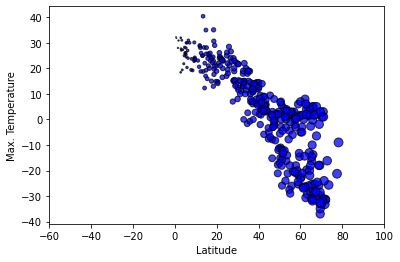

<Figure size 432x288 with 0 Axes>

In [11]:
x_axis = clean_city_data_df['Lat']
data = clean_city_data_df['Max Temp']

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlim(-60, 100)
plt.xlabel("Latitude")
plt.ylabel("Max. Temperature")
plt.title = "City Latitude vs. Max. Temperature"
# plt.xtitle("")
plt.show()
plt.savefig('fig1.png')

## Latitude vs. Humidity Plot

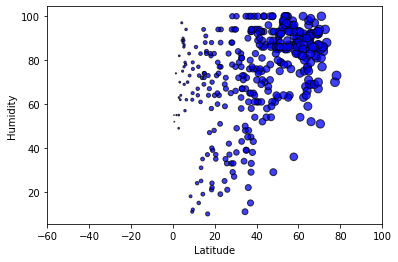

<Figure size 432x288 with 0 Axes>

In [12]:
x_axis = clean_city_data_df['Lat']
data = clean_city_data_df['Humidity']

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
# plt.title("City Latitude vs. Humidity")
plt.xlim(-60, 100)
plt.show()
plt.savefig('fig2.png')

## Latitude vs. Cloudiness Plot

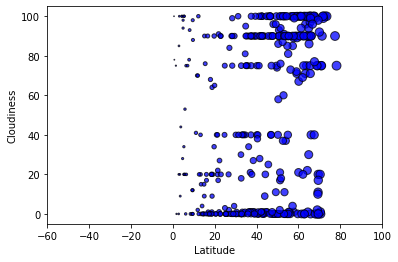

<Figure size 432x288 with 0 Axes>

In [13]:
x_axis = clean_city_data_df['Lat']
data = clean_city_data_df['Cloudiness']

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# plt.title("City Latitude vs. Cloudiness")
plt.xlim(-60, 100)
plt.show()
plt.savefig('fig3.png')

## Latitude vs. Wind Speed Plot

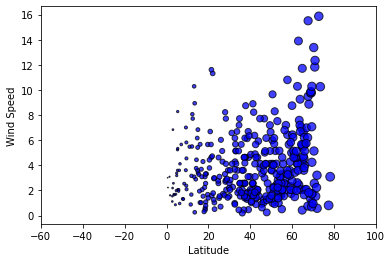

<Figure size 432x288 with 0 Axes>

In [14]:
x_axis = clean_city_data_df['Lat']
data = clean_city_data_df['Wind Speed']

plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black",
            s=x_axis, alpha=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# plt.title("City Latitude vs. Speed")
plt.xlim(-60, 100)
plt.show()
plt.savefig('fig4.png')

## Linear Regression

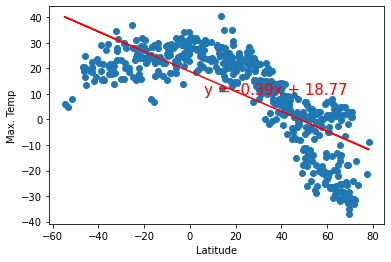

<Figure size 432x288 with 0 Axes>

In [15]:
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max. Temp')
plt.show()
plt.savefig('fig5.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7356292244361317


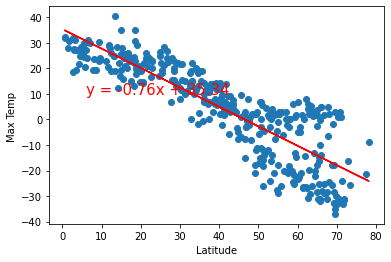

<Figure size 432x288 with 0 Axes>

In [16]:
#take the data frame and call it northo_df[lat] > 0 .loc to get the northen and <0 for southern hemispherer datafram 

northern_df = clean_city_data_df.loc[clean_city_data_df['Lat'] > 0]
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp ')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig6.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.20663332000322057


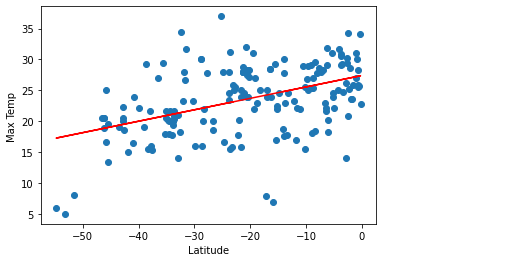

<Figure size 432x288 with 0 Axes>

In [17]:
southern_df = clean_city_data_df.loc[clean_city_data_df['Lat'] < 0]
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp ')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig7.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16584064857349556


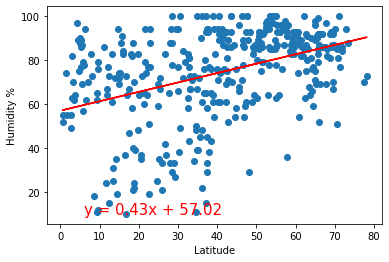

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig8.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.023972562543429863


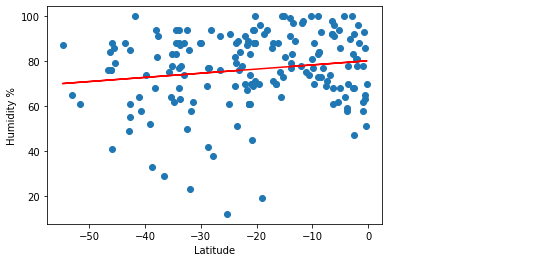

<Figure size 432x288 with 0 Axes>

In [19]:

x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig9.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08208221299638734


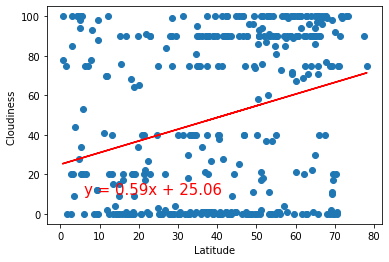

<Figure size 432x288 with 0 Axes>

In [20]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness ')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig10.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.050947670517129194


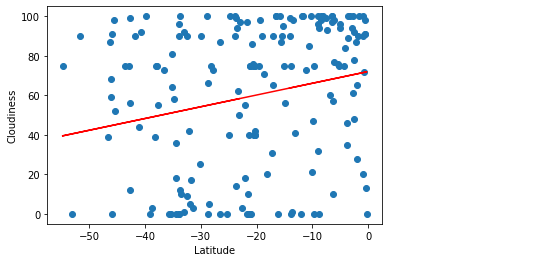

<Figure size 432x288 with 0 Axes>

In [21]:

x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig11.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04538026324074572


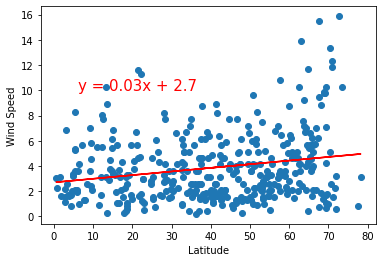

<Figure size 432x288 with 0 Axes>

In [22]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig12.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1418655679289444


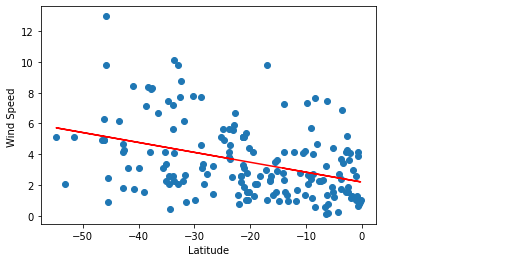

<Figure size 432x288 with 0 Axes>

In [23]:

x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed ')
print(f"The r-squared is: {rvalue**2}")
plt.show()
plt.savefig('fig13.png')